# Preamble

Most of this workshop is taken from Hadley's [R for Data Science](https://r4ds.had.co.nz/) book. You can find more examples, explanations and exercises there if you want.

## What this workshop covers and does not cover

In this workshop you'll learn principles behind exploratory data analysis and visualization, including tidying and transforming data to answer questions you might want to ask. What you will *not* learn is how to make specific plots.

# Package prerequisites

Packages that required in this workshop are **tidyverse**, which includes the packages **ggplot2**, **dplyr**, **purrr**, and others, **modelr** which provides some helpful functions for visualizing models, **gridExtra** which helps with graph situating, and **ggrepel** which helps with plot labels.

In [10]:
library(tidyverse)
library(modelr)
library(gridExtra)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘stringr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘modelr’ was built under R version 3.5.2”
Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



If you get an error message “there is no package called ‘tidyverse’” then you need to install the packages first. (They should have been preloaded on your notebooks but if not it's ok, it won't take long.)

In [4]:
#install.packages('tidyverse')
#install.packages('modelr')
#install.packages('gridExtra')
#install.packages('ggrepel')

# Visualizing Data

Core feature of exploratory data analysis is asking questions about data and searching for answers by visualizing and modeling data.

 * **Variable:** quantity, quality, property that can be measured.
 * **Value:** State of variable when measured.
 * **Observation:** Set of measurements made under similar conditions
 * **Tabular data:** Set of values, each associated with a variable and an observation.
 
Most questions around what type of variation or covariation occurs between variables.

Basic syntax of ggplot:
```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

# Tidying Data

Tidy data:
 * Each variable is its own column
 * Each observation is its own row
 * Each value is in a single cell

Consider the following tables:

In [4]:
table1 <- data.frame(makemodel=c("audi a4","audi a4","chevrolet corvette","chevrolet corvette","honda civic","honda civic"),
                    year=rep(c(1999,2008),3),
                    cty=c(18,21,15,15,24,25),
                    hwy=c(29,30,23,25,32,36))
table1

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


In [5]:
table2 <- data.frame(makemodel=c(rep("audi a4",4),rep("chevrolet corvette",4),rep("honda civic",4)),
                    year=rep(c(1999,1999,2008,2008),3),
                    type=rep(c("cty","hwy"),6),
                     mileage=c(18,29,21,30,15,23,15,25,24,32,25,36))
table2

manufacturer,year,type,mileage
audi a4,1999,cty,18
audi a4,1999,hwy,29
audi a4,2008,cty,21
audi a4,2008,hwy,30
chevrolet corvette,1999,cty,15
chevrolet corvette,1999,hwy,23
chevrolet corvette,2008,cty,15
chevrolet corvette,2008,hwy,25
honda civic,1999,cty,24
honda civic,1999,hwy,32


In [6]:
table3 <- data.frame(makemodel=c("audi a4","audi a4","chevrolet corvette","chevrolet corvette","honda civic","honda civic"),
                     year=rep(c(1999,2008),3),
                    mileages=c('18/29','21/30','15/23','15/25','24/32','25/36'))
table3

makemodel,year,mileages
audi a4,1999,18/29
audi a4,2008,21/30
chevrolet corvette,1999,15/23
chevrolet corvette,2008,15/25
honda civic,1999,24/32
honda civic,2008,25/36


In [8]:
table4a <- data.frame(makemodel=c("audi a4","chevrolet corvette","honda civic"),`1999`=c(18,15,24),'2000'=c(21,15,25),check.names=FALSE)
table4b <- data.frame(makemodel=c("audi a4","chevrolet corvette","honda civic"),`1999`=c(29,23,32),'2000'=c(30,25,36),check.names=FALSE)
table4a
table4b

makemodel,1999,2000
audi a4,18,21
chevrolet corvette,15,15
honda civic,24,25


makemodel,1999,2000
audi a4,29,30
chevrolet corvette,23,25
honda civic,32,36


## Gathering

`table4a` column names `1999` and `2008` represent values of `year` variable. Each row represents 2 observations, not 1. Need to gather columns into new pair of variables.

Parameters:
 * Set of columns that represent values, not variables.
 * `key`: name of variable whose values are currently column names.
 * `value`: name of variable whose values are currently spread out across multiple columns.

In [21]:
tidy4a <- gather(table4a,`1999`,`2000`,key="year",value="cty")
tidy4a

makemodel,year,cty
audi a4,1999,18
chevrolet corvette,1999,15
honda civic,1999,24
audi a4,2000,21
chevrolet corvette,2000,15
honda civic,2000,25


In [22]:
tidy4b <- gather(table4b, `1999`, `2000`, key = "year", value = "hwy")
tidy4b

makemodel,year,hwy
audi a4,1999,29
chevrolet corvette,1999,23
honda civic,1999,32
audi a4,2000,30
chevrolet corvette,2000,25
honda civic,2000,36


Merge tables using `left_join()` (many other types of table joins as well)

In [13]:
left_join(tidy4a,tidy4b)

Joining, by = c("makemodel", "year")


makemodel,year,cty,hwy
audi a4,1999,18,29
chevrolet corvette,1999,15,23
honda civic,1999,24,32
audi a4,2000,21,30
chevrolet corvette,2000,15,25
honda civic,2000,25,36


## Spreading

`table2` has each observation in two rows. Need to spread observations across columns with appropriate variable names instead.

Parameters:
 * `key`: Column that contains variable names.
 * `value`: Column that contains values for each variable.

In [23]:
spread(table2, key=type,value=mileage)

manufacturer,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


## Separating

`table3` has `mileages` column that actually contains two variables (`cty` and `hwy`). Need to separate into two columns.

Parameters:
 * column/variable that needs to be separated.
 * `into`: columns to split into
 * `sep`: separator value. Can be regexp or positions to split at. If not provided then splits at non-alphanumeric characters.

In [24]:
separate(table3, mileages, into = c("cty", "hwy"), sep="/")

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


In [28]:
sep <- separate(table3, makemodel, into = c("make", "model"), sep = ' ')
sep

make,model,year,mileages
audi,a4,1999,18/29
audi,a4,2008,21/30
chevrolet,corvette,1999,15/23
chevrolet,corvette,2008,15/25
honda,civic,1999,24/32
honda,civic,2008,25/36


## Uniting

Now `sep` has `make` and `model` columns that can be combined into a single column. In other words, we want to unite them.

Parameters:
 * Name of united column/variable
 * Names of columns/variables to be united
 * `sep`: Separator value. Default is '_'


In [29]:
unite(sep, new, make, model)

new,year,mileages
audi_a4,1999,18/29
audi_a4,2008,21/30
chevrolet_corvette,1999,15/23
chevrolet_corvette,2008,15/25
honda_civic,1999,24/32
honda_civic,2008,25/36


In [31]:
unite(sep, makemodel, make, model, sep=' ')

makemodel,year,mileages
audi a4,1999,18/29
audi a4,2008,21/30
chevrolet corvette,1999,15/23
chevrolet corvette,2008,15/25
honda civic,1999,24/32
honda civic,2008,25/36


## Piping

**dplyr** from **tidyverse** contains the 'pipe' (`%>%`) which allows you to combine multiple operations, directly taking output from a funtion as input to the next. Can save time and memory as well as make code easier to read. Can think of it this way: `x %>% f(y)` becomes `f(x,y)`, and `x %>% f(y) %>% g(z)` becomes `g(f(x,y),z)`, etc.

In [32]:
unite(sep, makemodel, make, model, sep=' ') %>%
    separate(mileages, into=c("cty","hwy"))

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


## Not all data should be tidy

Matrices, phylogenetic trees (although `ggtree` and `treeio` have tidy representations that help with annotating trees), etc.

# Transforming (Tidy) Data

 * `filter()` to pick observations (rows) by their values
 * `arrange()` to reorder rows, default is by ascending value
 * `select()` to pick variables (columns) by their names
 * `mutate()` to create new variables with functions of existing variables
 * `summarise()` to collapes many values down to a single summary
 * `group_by()` to set up functions to operate on groups rather than the whole data set
 * `%>%` propagates the output from a function as input to another. eg: x %>% f(y) becomes f(x,y), and x %>% f(y) %>% g(z) becomes g(f(x,y),z).
 
All functions have similar structure:
 1. First argument is data frame
 2. Next arguments describe what to do with data frame using variable names
 3. Result is new data frame
 
Will be working with data frame **mpg** for rest of workshop which comes with the **tidyverse** library.

In [33]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## `filter()` rows/observations

As name suggests filters out rows. First argument is name of data frame, next arguments are expressions that filter the data frame.

In [25]:
# filter out 2seater cars
no_2seaters <- filter(mpg, class != "2seater")
head(no_2seaters)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [35]:
# filter out audis, chevys, and hondas
mpg %>% filter(!manufacturer %in% c("audi","chevrolet","honda")) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan


## `arrange()` rows/observations

Changes order of rows. First argument is name of data frame, next arguments are column names (or more complicated expressions) to order by. Default column ordering is by ascending order, can use `desc()` to do descending order. Missing values get sorted at the end regardless of what column ordering is chosen.

In [25]:
# arrange/reorder mpg by class
arrange(mpg, class) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [26]:
# arrange/reorder data frame with 2seaters filtered out by class
# 2seaters does not appear which is as it should be
arrange(no_2seaters, class) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


What kinds of cars have the best highway and city gas mileage?

In [53]:
# arrange mpg so that first hwy mileage is by descending order, then cty mileage is by descending order
arrange(mpg, desc(hwy), desc(cty)) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


In [42]:
df <- data.frame(x=c(5,2,NA,6))
# arrange df by ascending order, NA will be at bottom
arrange(df, x)
# arrange df by descending order, NA will be at bottom
arrange(df, desc(x))
# arrange df by F/T, where F comes first. NA goes to the top and the rest of the values are unsorted
# because they are all T for !is.na(x)
arrange(df,!is.na(x))

x
2
5
6
NA


x
6
5
2
NA


x
NA
5
2
6


## `select()` columns/variables

Selects columns, which can be useful when you have hundreds or thousands of variables in order to narrow down to what variables you're actually interested in. First argument is name of data frame, subsequent arguments are columns to select. Can use `a:b` to select all columns between `a` and `b`, or use `-a` to select all columns *except* a.

In [47]:
# select manufacturer, model, year, cty, hwy
select(mpg, manufacturer, model, year, cty, hwy) %>% head

manufacturer,model,year,cty,hwy
audi,a4,1999,18,29
audi,a4,1999,21,29
audi,a4,2008,20,31
audi,a4,2008,21,30
audi,a4,1999,16,26
audi,a4,1999,18,26


In [49]:
# select all columns model thru hwy
select(mpg, model:hwy) %>% head

model,displ,year,cyl,trans,drv,cty,hwy
a4,1.8,1999,4,auto(l5),f,18,29
a4,1.8,1999,4,manual(m5),f,21,29
a4,2.0,2008,4,manual(m6),f,20,31
a4,2.0,2008,4,auto(av),f,21,30
a4,2.8,1999,6,auto(l5),f,16,26
a4,2.8,1999,6,manual(m5),f,18,26


In [52]:
# select all columns except cyl thru drv and class
select(mpg, -(cyl:drv), -class) %>% head

manufacturer,model,displ,year,cty,hwy,fl
audi,a4,1.8,1999,18,29,p
audi,a4,1.8,1999,21,29,p
audi,a4,2.0,2008,20,31,p
audi,a4,2.0,2008,21,30,p
audi,a4,2.8,1999,16,26,p
audi,a4,2.8,1999,18,26,p


## `mutate()` to add new variables or `transmute()` to keep only new variables

Adds new columns that are functions of existing columns. First argument is name of data frame, next arguments are of the form `new_column_name = f(existing columns)`.

In [54]:
# add a new column that takes average mileage between city and highway
mutate(mpg, avg_mileage = (cty+hwy)/2) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0


In [55]:
# keep only average mileage between city and highway
transmute(mpg,avg_mileage=(cty+hwy)/2) %>% head

avg_mileage
23.5
25.0
25.5
25.5
21.0
22.0


## `summarise()` and `group_by()` for grouped summaries

`summarise()` collapses a data frame into a single row, and `group_by()` changes analysis from entire data frame into individual groups.

In [75]:
# get average mileage grouped by engine displacement
m <- mutate(mpg, avg_mileage=(cty+hwy)/2)
m %>% group_by(cyl) %>%
    summarise(avg=mean(avg_mileage)) %>%
    head

cyl,avg
4,24.90741
5,24.62500
6,19.51899
8,15.10000


In [74]:
group_by(m, drv) %>%
    summarise(avg=mean(avg_mileage))

drv,avg
4,16.75243
f,24.06604
r,17.54000


In [33]:
group_by(m, drv, cyl) %>% summarise(avg=mean(avg_mileage)) %>% arrange(desc(avg))

drv,cyl,avg
f,4,26.26724
f,5,24.62500
4,4,21.47826
r,6,21.25000
f,6,21.12791
f,8,20.50000
4,6,17.14062
r,8,16.83333
4,8,14.22917


# Back to Visualizing Data

Basic syntax of ggplot:
```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

In [3]:
head(mpg) # automatically loaded when you load tidyverse

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


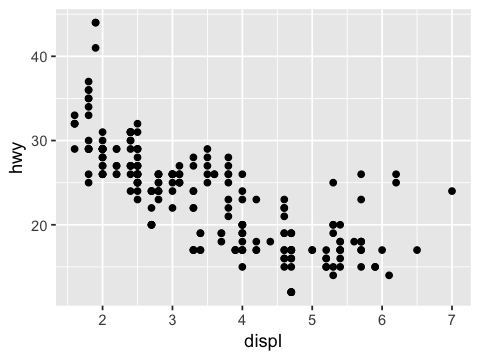

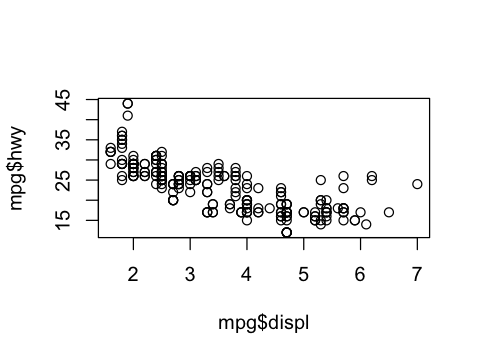

In [6]:
# ```{r}
#ggplot(data=<DATA>) +
#    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
#```
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy))
plot(x=mpg$displ,y=mpg$hwy)

## `<MAPPINGS>`

Visual property of objects in plot, i.e. size, shape, color. Can display points in different ways by changing value of aesthetic properties. These are known as **levels**.

In [9]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”

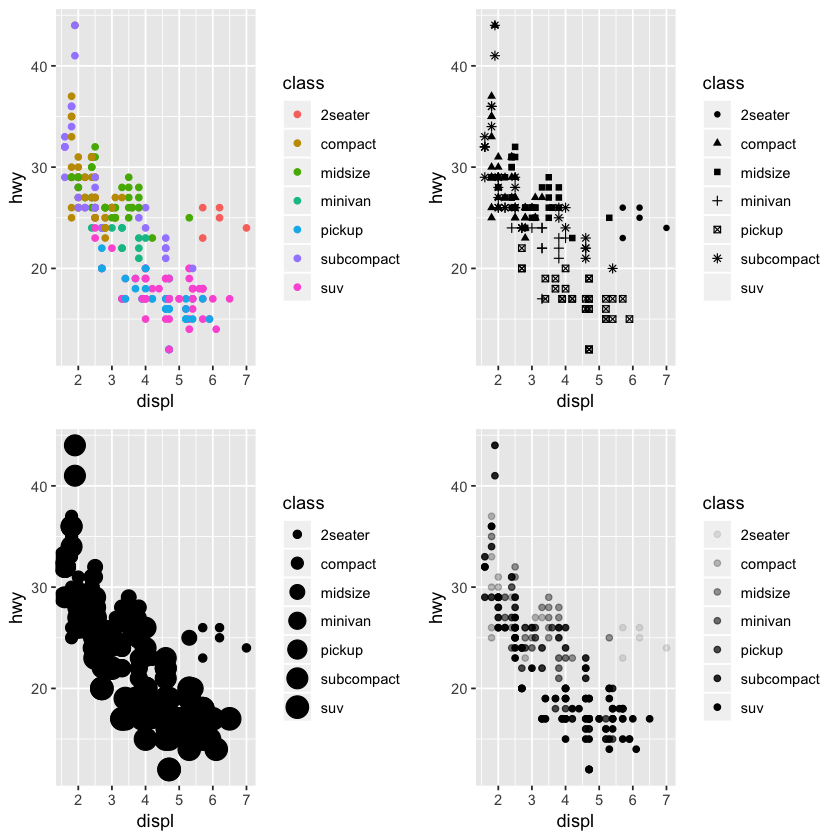

In [10]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=class))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=class))
p3 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,size=class))
p4 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,alpha=class))
grid.arrange(p1,p2,p3,p4,nrow=2)

Note: **ggplot2** automatically assigns levels and a scale to values. That's why in the size mapping there's no shape for suv, and why the following two pieces of code do different things.

Levels and scales associated with aesthetics... slow down, first define what are levels and what are scales come back to here

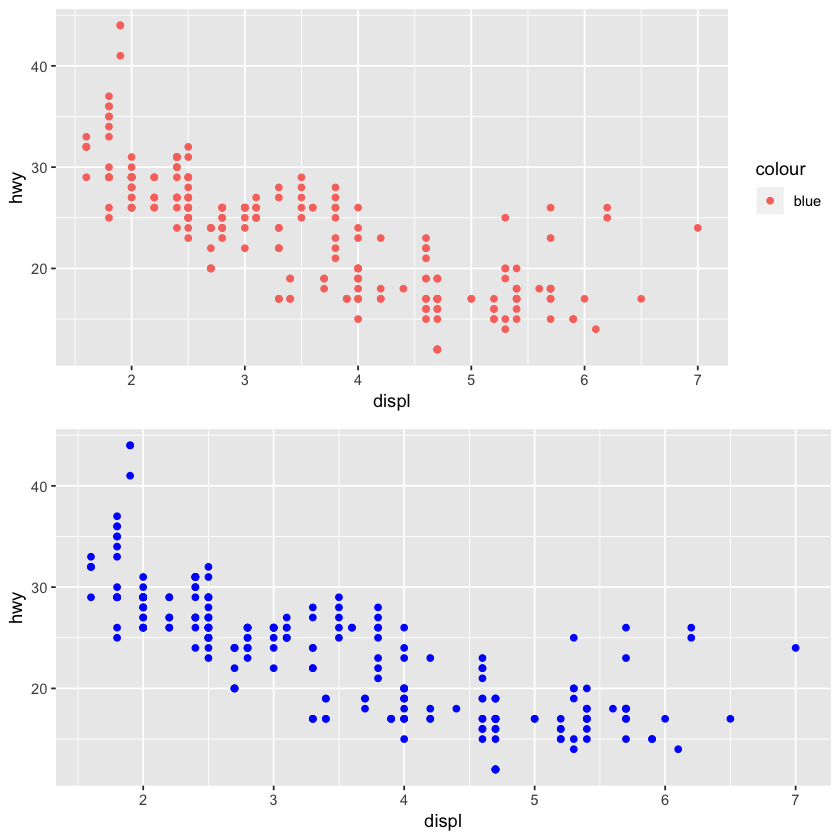

In [11]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color='blue'))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy),color='blue')
grid.arrange(p1,p2)

## `<GEOM_FUNCTION>`

```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

**geom** geometrical object plot uses to represent data. Bar charts use bar geoms, line charts use line geoms, boxplots, etc. Scatterplots use point geoms. (Put list of geoms in ggplot2)

Every geom function in ggplot2 takes a `mapping` argument with specific aesthetic mappings that are possible.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


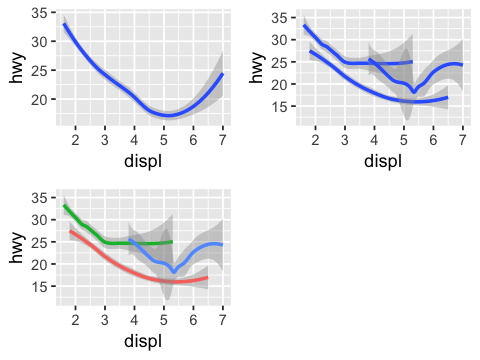

In [9]:
p1 <- ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))
              
p2 <- ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
    
p3 <- ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )

grid.arrange(p1,p2,p3, nrow=2)

Can display multiple geoms on same plot just by adding them

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


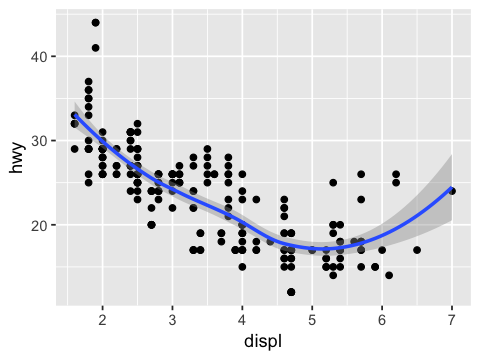

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

# put in a cell underneath
ggplot(data = mpg, mapping=aes(x=displ,y=hwy)) + 
  geom_point() +
  geom_smooth()

`ggplot()` function contains *global* mapping, while each geom has a local mapping

 * `loess` from **stats** for polynomial regression
 * `lm` from **stats** for linear models (you can also fit other models)

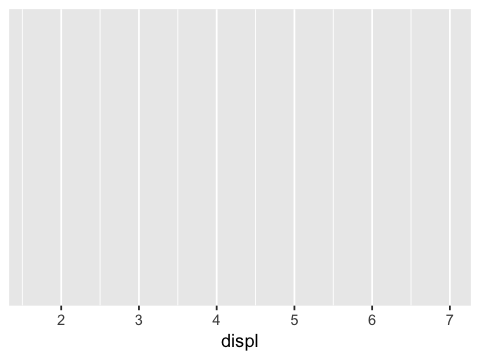

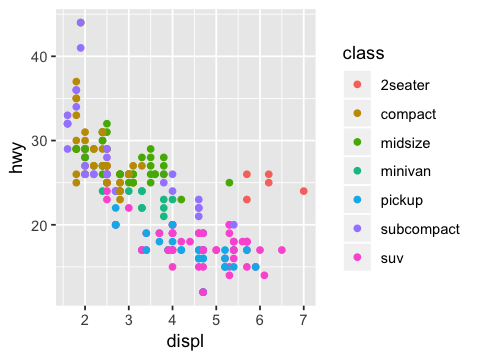

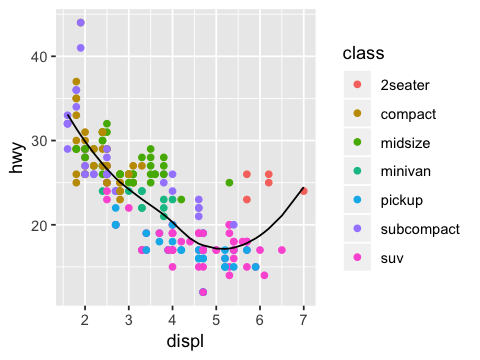

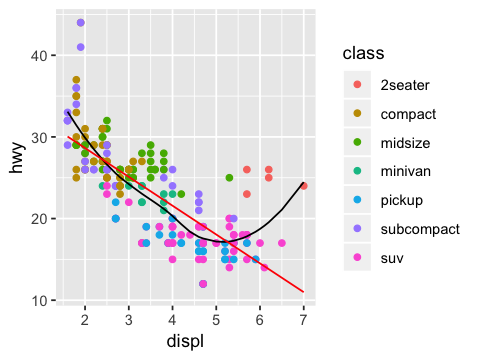

In [14]:
p<-loess(hwy~displ,data=mpg)
grid <- data_grid(data=mpg,displ)
pred1 <- add_predictions(data=grid,p)

p2 <- lm(hwy~displ,data=mpg)
pred2 <- add_predictions(data=grid,p2)

# split plot up into step-by-step
ggplot(data=mpg, mapping=aes(x=displ))

ggplot(data=mpg, mapping=aes(x=displ)) + geom_point(mapping=aes(y=hwy,color=class))

ggplot(data=mpg, mapping=aes(x=displ)) + geom_point(mapping=aes(y=hwy,color=class))+
    geom_line(aes(y=pred),data=pred1)

ggplot(data=mpg, mapping=aes(x=displ)) + geom_point(mapping=aes(y=hwy,color=class))+
    geom_line(aes(y=pred),data=pred1) +
    geom_line(aes(y=pred),data=pred2,color='red')

In [ ]:
# it works

## More syntax

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

### Facets

Subplots displaying one subset of data.

 * `facet_wrap()` for a single variable.
 * `facet_grid()` for along 2 variables.

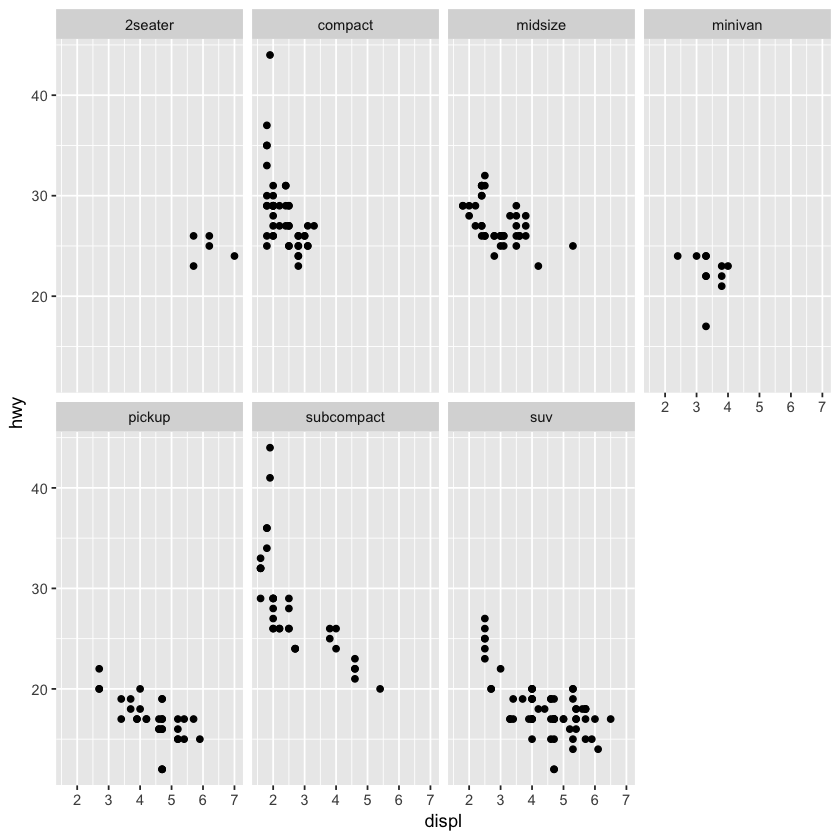

In [15]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=2)

# do nrow=3 or ncol as well to show
# be careful about making sure that x axes are all the same size

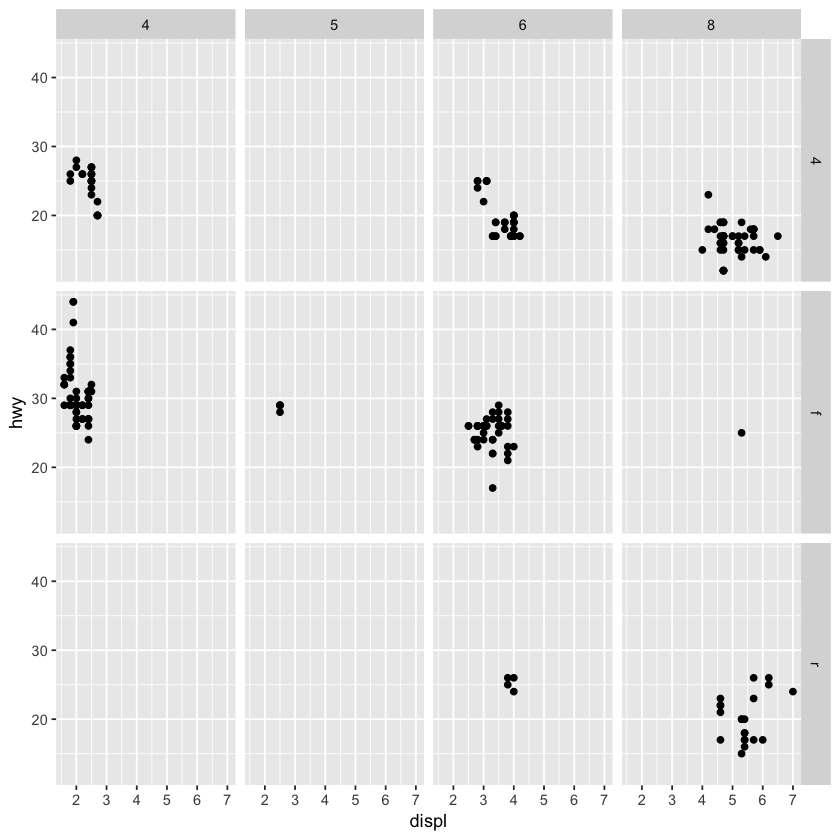

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

### Stats

Algorithm used to calculate new values for a graph. Each geom object has a default stat, and each stat has a default geom.

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


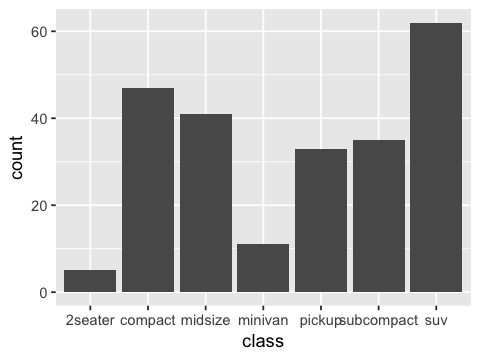

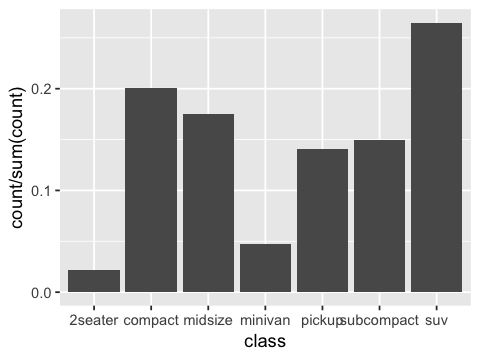

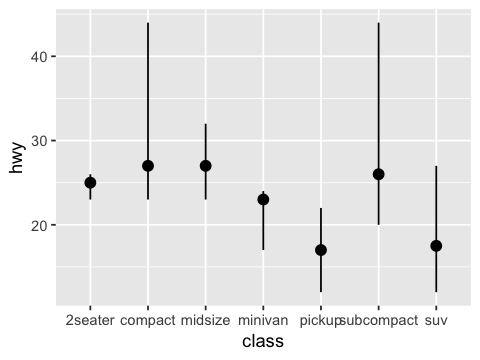

In [22]:
head(mpg)

p1 <- ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class))

p2 <- ggplot(data=mpg) + geom_bar(mapping=aes(x=class,y=..count../sum(..count..)))

# look up what kind of geom stat_summary is associated with
# geom_pointrange
p3 <- ggplot(data = mpg) + 
  stat_summary(
    mapping = aes(x = class, y = hwy),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

p1
p2
p3

### Position adjustments

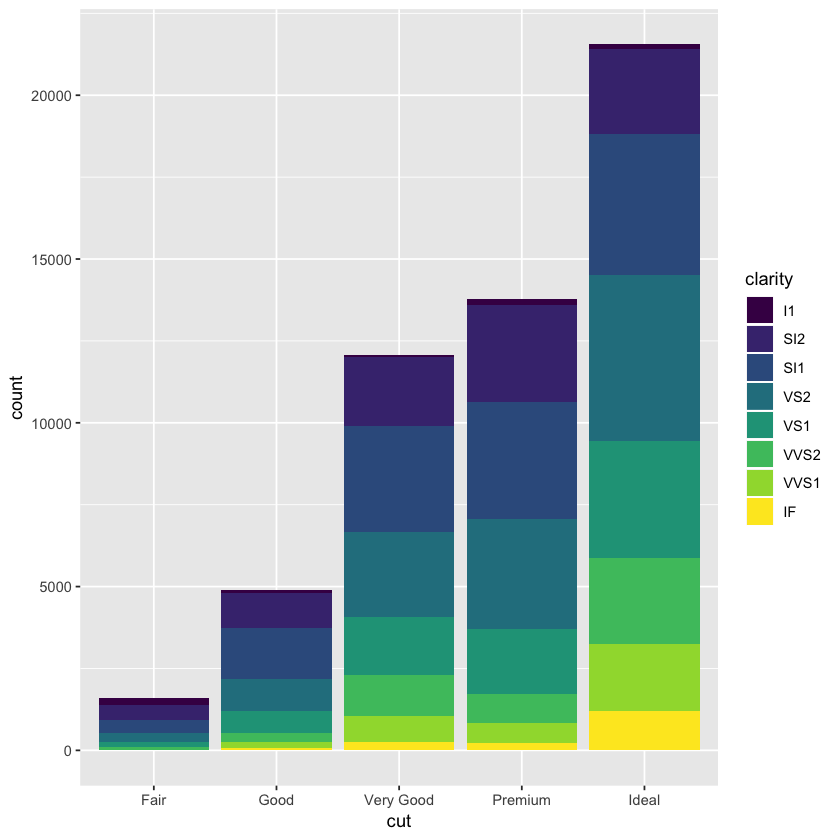

In [18]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

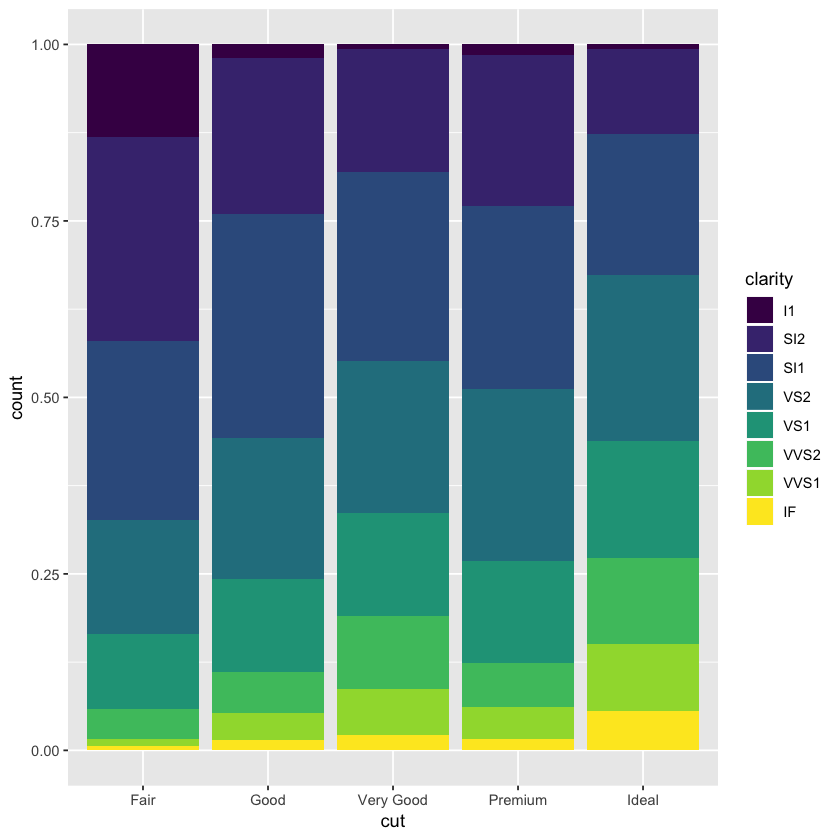

In [19]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity),position="fill")

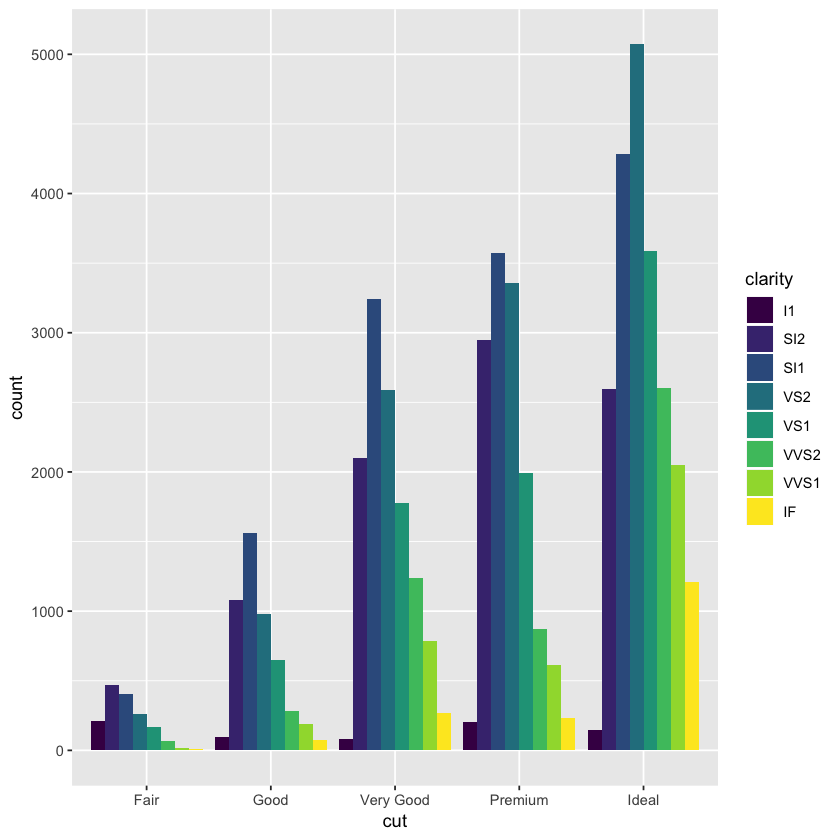

In [20]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity),position="dodge")

### Coordinate systems

 * `coord_flip()` switches x and y axes.
 * `coord_quickmap()` sets aspect ratio for maps.
 * `coord_polar()` sets polar coordinates.

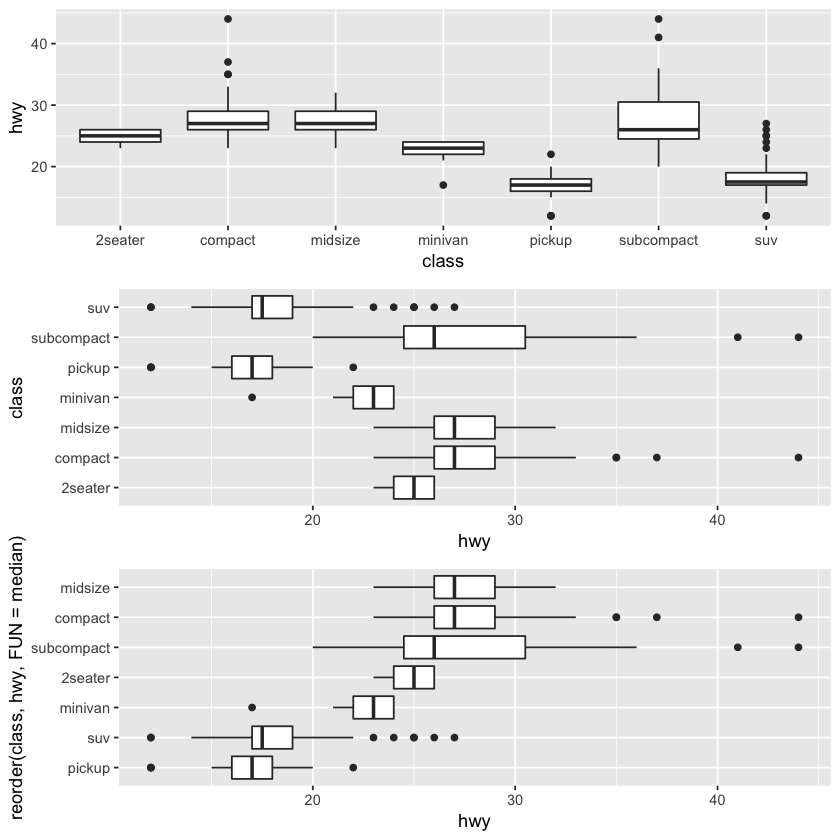

In [21]:
p1 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
p2 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()
p3 <- ggplot(data = mpg, mapping = aes(x = reorder(class,hwy,FUN=median), y = hwy)) + 
  geom_boxplot() +
  coord_flip()

grid.arrange(p1,p2,p3)


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



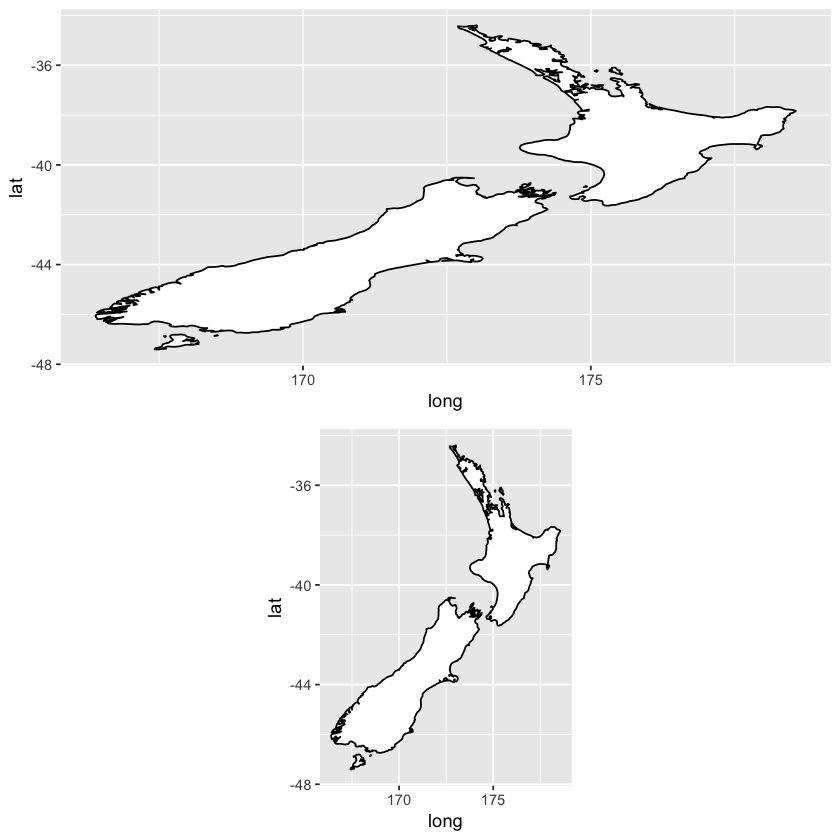

In [22]:
nz <- map_data("nz")

p1 <- ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

p2 <- ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()

grid.arrange(p1,p2)

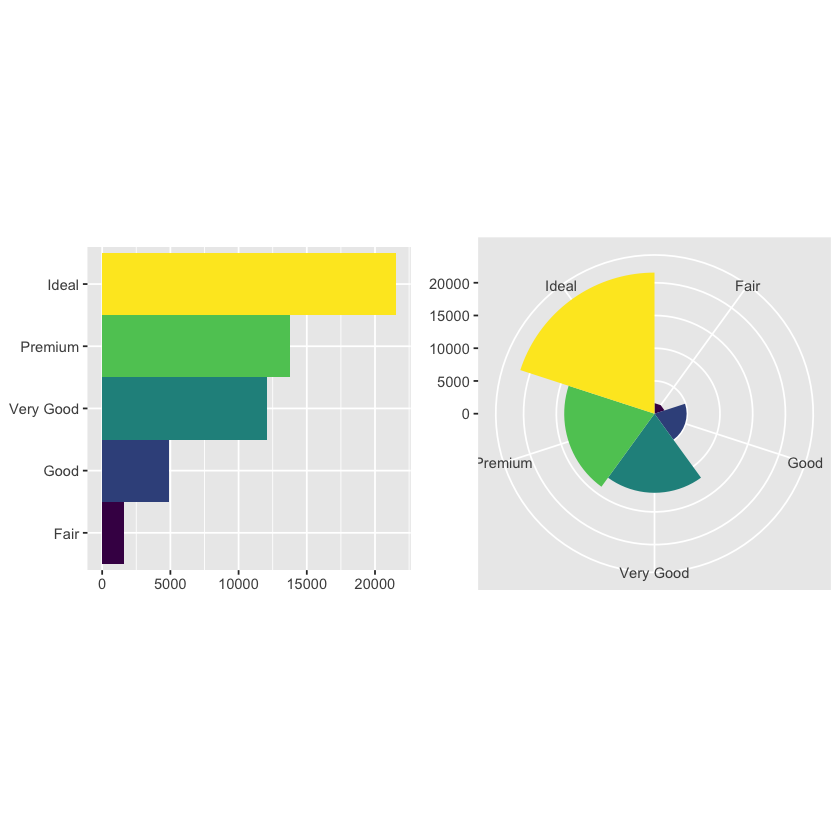

In [23]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

p1 <- bar + coord_flip()
p2 <- bar + coord_polar()
grid.arrange(p1,p2, nrow=1)v

In [23]:
# give summary about functions used
# in the end when we went thru this we used all these different functions: ggplot, geom_point, geom_smooth, geom_line, etc etc

# Importing Data

## readr

The package **readr** provides options for importing data that has already been set up as tables, such as csvs:
 * `read_csv()` is for comma-delimited files
 * `read_csv2()` is for semicolon-delimited files
 * `read_tsv()` is for tab-delimited files
 * `read_delim()` is for any other delimiters
 * `read_fwf()` is for fixed width files
 * `read_table()` is for fixed width files with columns separated by white space

If you are used to using `read.csv`, `read.table` or other functions from **utils**, these are almost exactly the same except that they import data as tibbles (special kind of data frame designed for dplyr that contains column type info, dimensions and prints out only beginning of df instead of all) instead of data frames. They are also about 10x faster, provide progress bars when loading larger files, and provide typing for columns.

If your file is massive and you *really* need something as fast as possible, look into the **data.table** package (or consider writing your core functions in C++ and using the **Rcpp** package). Data tables don't fit exactly into the tidyverse but it is not too much more of a learning curve.

In [36]:
mtcars <- read_csv(readr_example("mtcars.csv"))

Parsed with column specification:
cols(
  mpg = col_double(),
  cyl = col_double(),
  disp = col_double(),
  hp = col_double(),
  drat = col_double(),
  wt = col_double(),
  qsec = col_double(),
  vs = col_double(),
  am = col_double(),
  gear = col_double(),
  carb = col_double()
)


These functions have other optional arguments that can be helpful as well.

 * `delim`: in `read_delim()` denotes what delimiter to use
 * `col_types`: if you know what column types you want your tibble to have, specify it here. Can be useful because often data gets parsed as `factor` or `character` when you may want it to be `character` or `numeric`.
 * `skip`: how many lines to skip. Default is 0. Useful for when the file you're reading in has comments at the beginning, such as in SAM files.

We won't go through the other arguments, but you can view them in the help for the functions.

In [37]:
?read_csv

In [38]:
challenge <- read_csv(readr_example("challenge.csv"))
problems(challenge)

Parsed with column specification:
cols(
  x = col_double(),
  y = col_logical()
)
Warning message:
“1000 parsing failures.
 row col           expected     actual                                                                                         file
1001   y 1/0/T/F/TRUE/FALSE 2015-01-16 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1002   y 1/0/T/F/TRUE/FALSE 2018-05-18 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1003   y 1/0/T/F/TRUE/FALSE 2015-09-05 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1004   y 1/0/T/F/TRUE/FALSE 2012-11-28 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1005   y 1/0/T/F/TRUE/FALSE 2020-01-13 '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
.... ... .................. .......... ..............................................

row,col,expected,actual,file
1001,y,1/0/T/F/TRUE/FALSE,2015-01-16,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1002,y,1/0/T/F/TRUE/FALSE,2018-05-18,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1003,y,1/0/T/F/TRUE/FALSE,2015-09-05,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1004,y,1/0/T/F/TRUE/FALSE,2012-11-28,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1005,y,1/0/T/F/TRUE/FALSE,2020-01-13,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1006,y,1/0/T/F/TRUE/FALSE,2016-04-17,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1007,y,1/0/T/F/TRUE/FALSE,2011-05-14,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1008,y,1/0/T/F/TRUE/FALSE,2020-07-18,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1009,y,1/0/T/F/TRUE/FALSE,2011-04-30,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'
1010,y,1/0/T/F/TRUE/FALSE,2010-05-11,'/Library/Frameworks/R.framework/Versions/3.5/Resources/library/readr/extdata/challenge.csv'


# Publication Quality Graphs

## Labels

`labs()` to add most kinds of labels: title, subtitle, captions, x-axis, y-axis, legend, etc.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


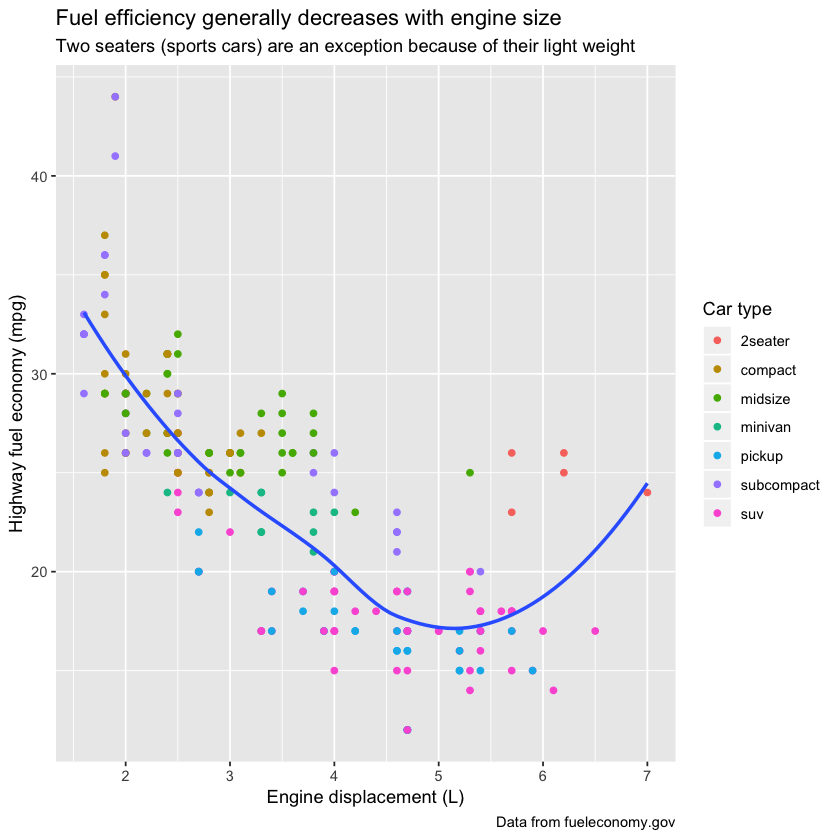

In [50]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Annotations

Can use `geom_text()` to add text labesls on the plot.

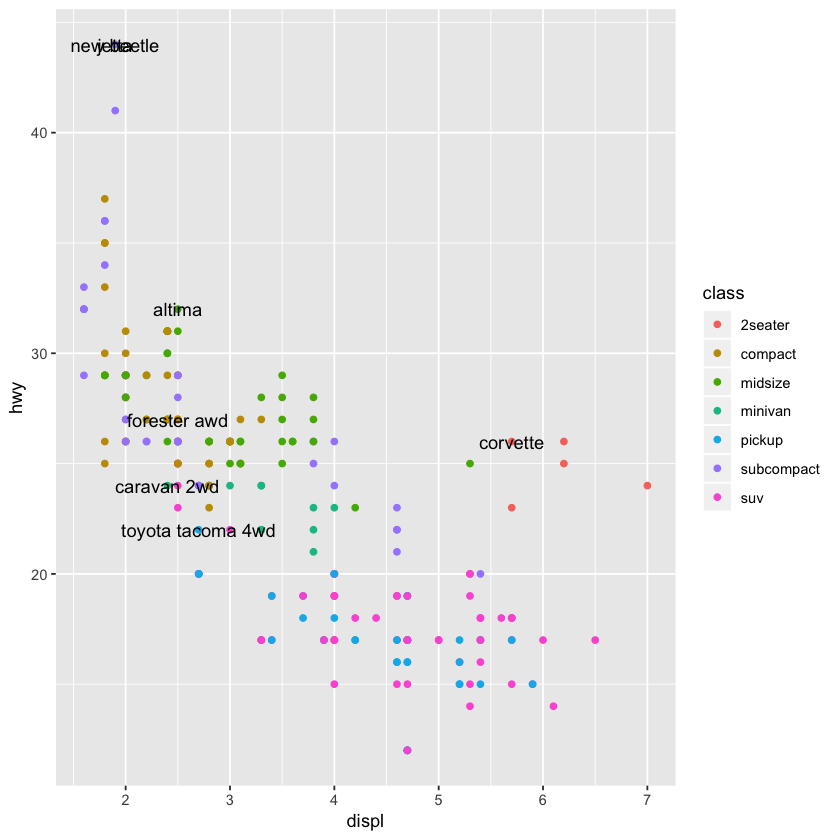

In [51]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

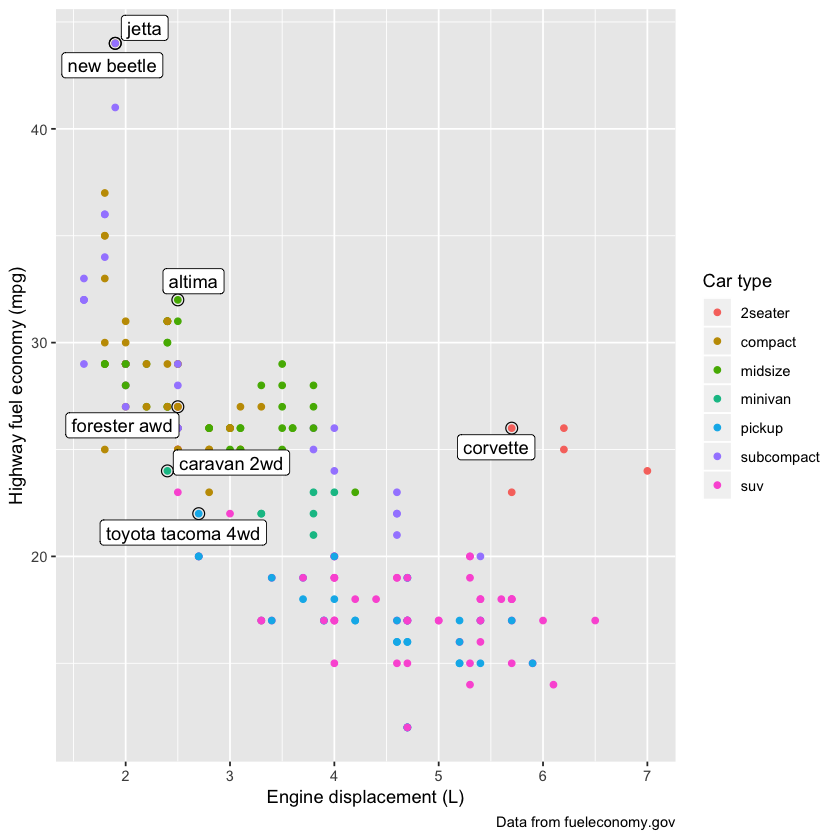

In [52]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class) +
  labs(
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Scales

 * `breaks`: For the position of ticks
 * `labels`: For the text label associated with each tick.
 * Default scale is x continuous, y continuous but can also do x logarithmic, y logarithmic, change color scales.

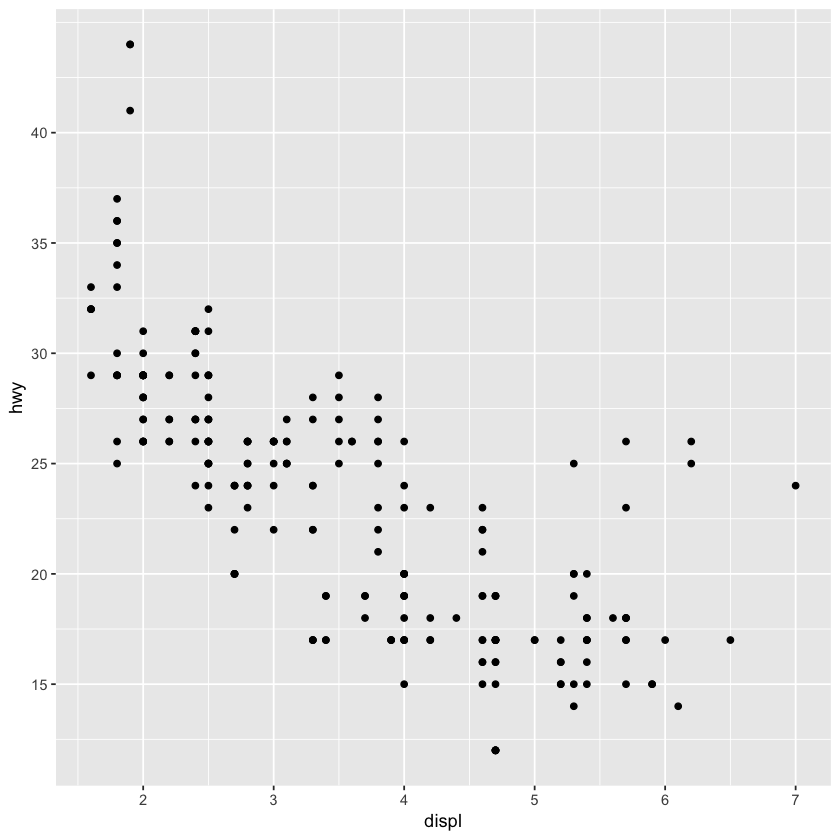

In [53]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

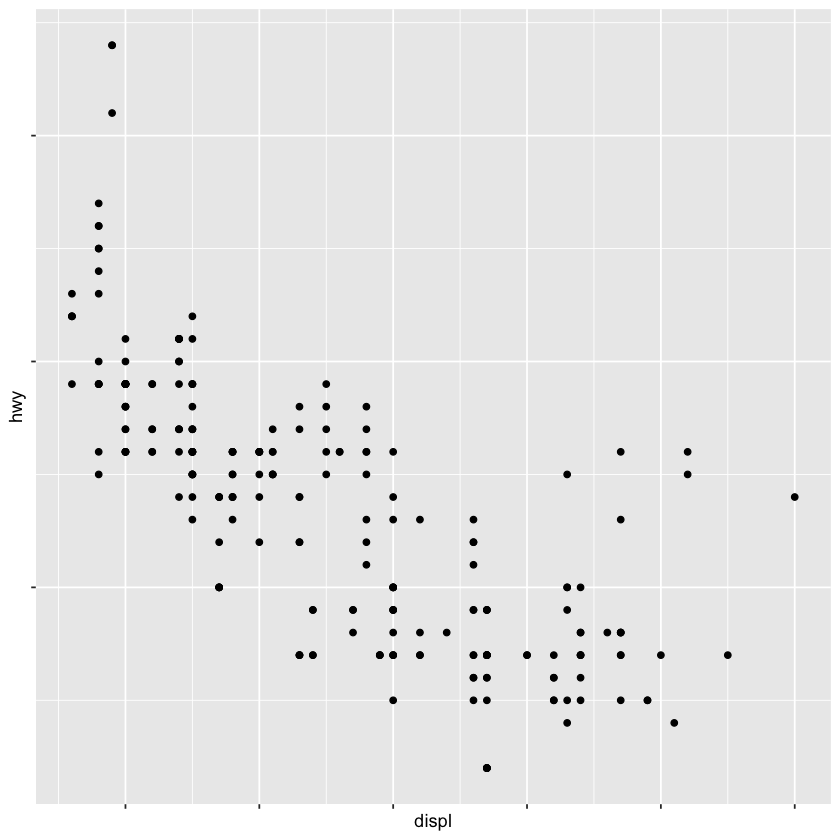

In [54]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

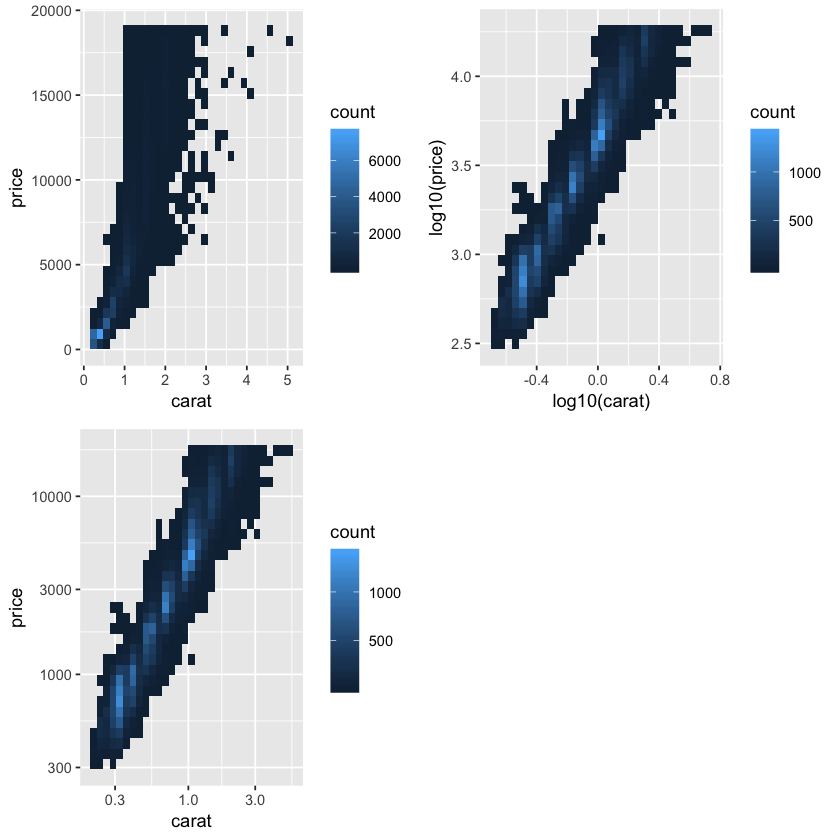

In [55]:
p1 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()

# don't use hexbin because it becomes a new plot,
# or use it but just talk about the plot rather than mention that it's a hexbin plot

p2 <- ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

p3 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

grid.arrange(p1,p2,p3,nrow=2)

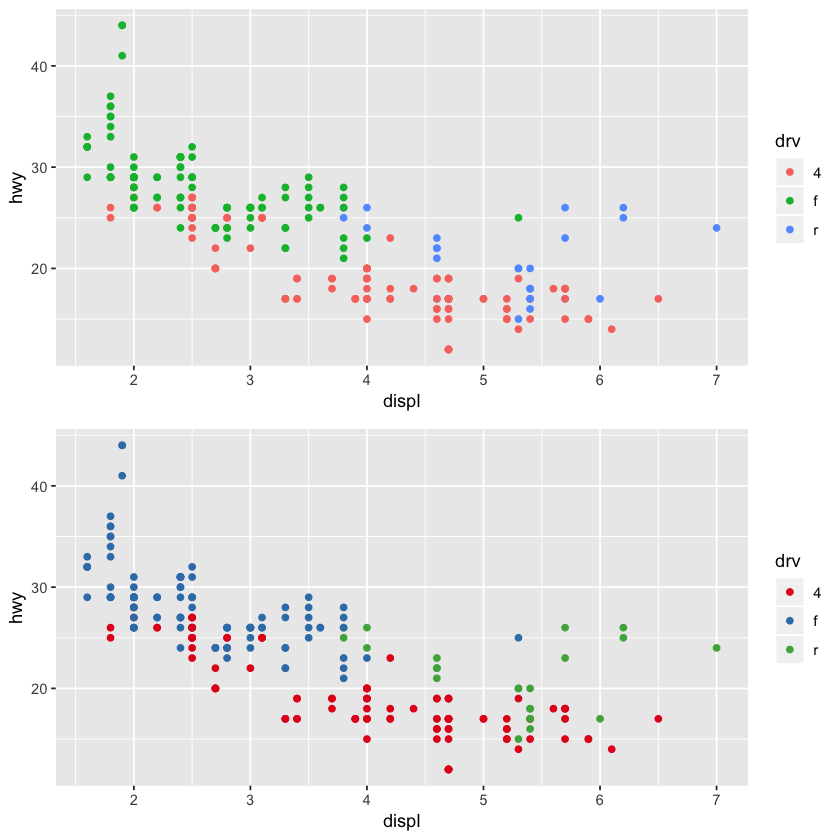

In [56]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

p2 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

grid.arrange(p1,p2)

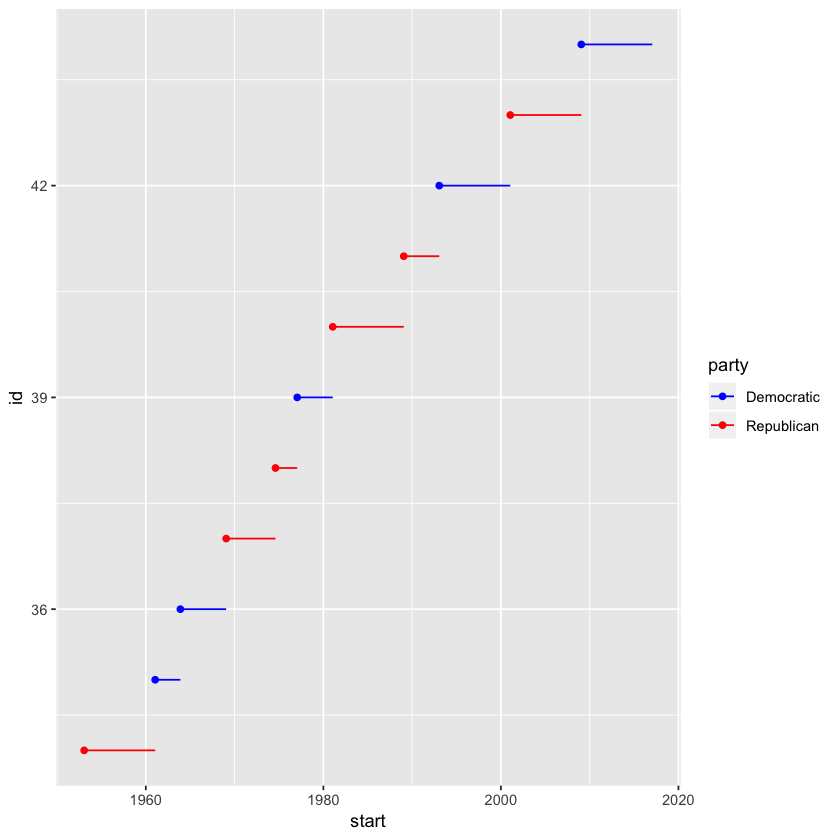

In [57]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id, colour = party)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_colour_manual(values = c(Republican = "red", Democratic = "blue"))

## Legend positioning

`theme(legend.position)` to control legend position. `guides()` with `guide_legened()` or `guide_colourbar()` for legend display.

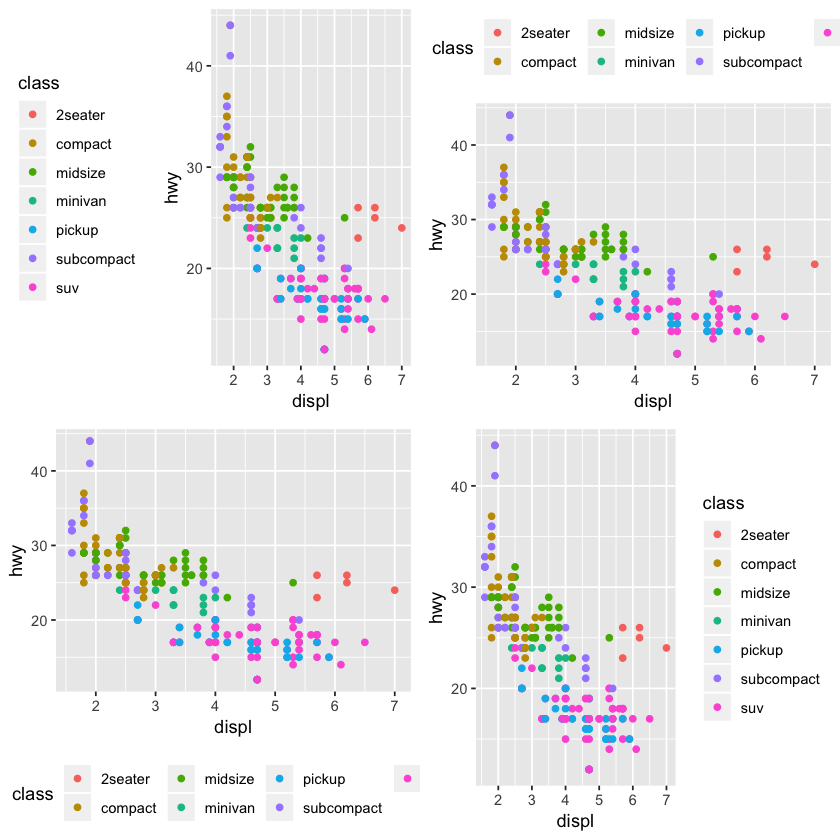

In [58]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

p1 <- base + theme(legend.position = "left")
p2 <- base + theme(legend.position = "top")
p3 <- base + theme(legend.position = "bottom")
p4 <- base + theme(legend.position = "right")

grid.arrange(p1,p2,p3,p4, nrow=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


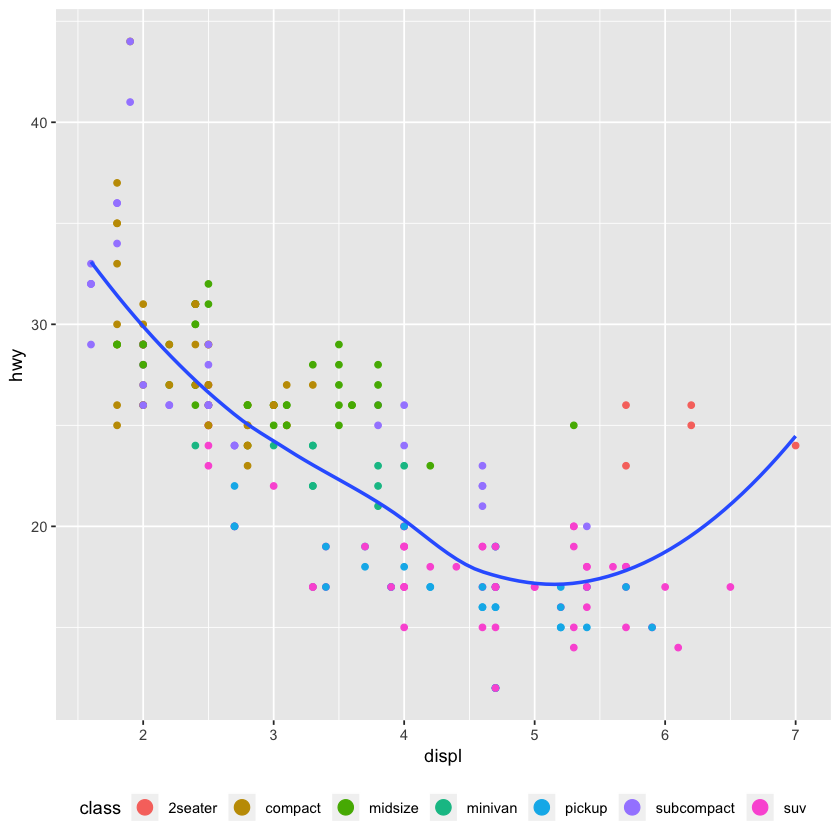

In [59]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))

## Zooming

Three ways to control plot limits:
 * Adjusting what data are plotted
 * Setting limits in each scale
 * Setting `xlim` and `ylim` in `coord_cartesian()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


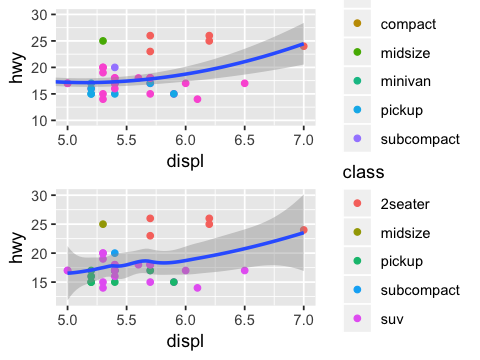

In [27]:
# subheading, quick description of what it is

p1 <- ggplot(mpg, mapping = aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth() +
  coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

p2 <- filter(mpg, displ >= 5, displ <= 7, hwy >= 10, hwy <= 30) %>%
  ggplot(aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth()

grid.arrange(p1,p2)

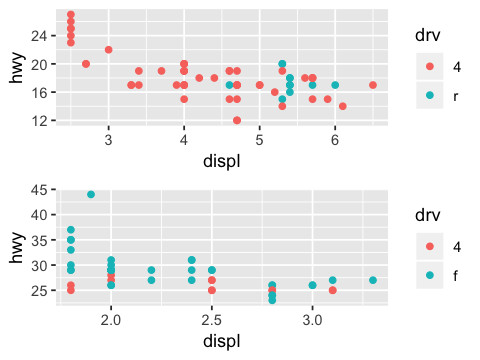

In [30]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

p1 <- ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point()

p2 <- ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point()

grid.arrange(p1,p2)

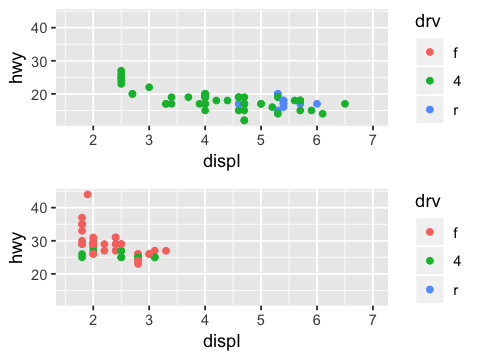

In [31]:
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

p1 <- ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

p2 <- ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

grid.arrange(p1,p2)

## Themes

**ggplot2** has 8 themes by default, can get more in other packages like **ggthemes**. Generally prefer `theme_classic()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


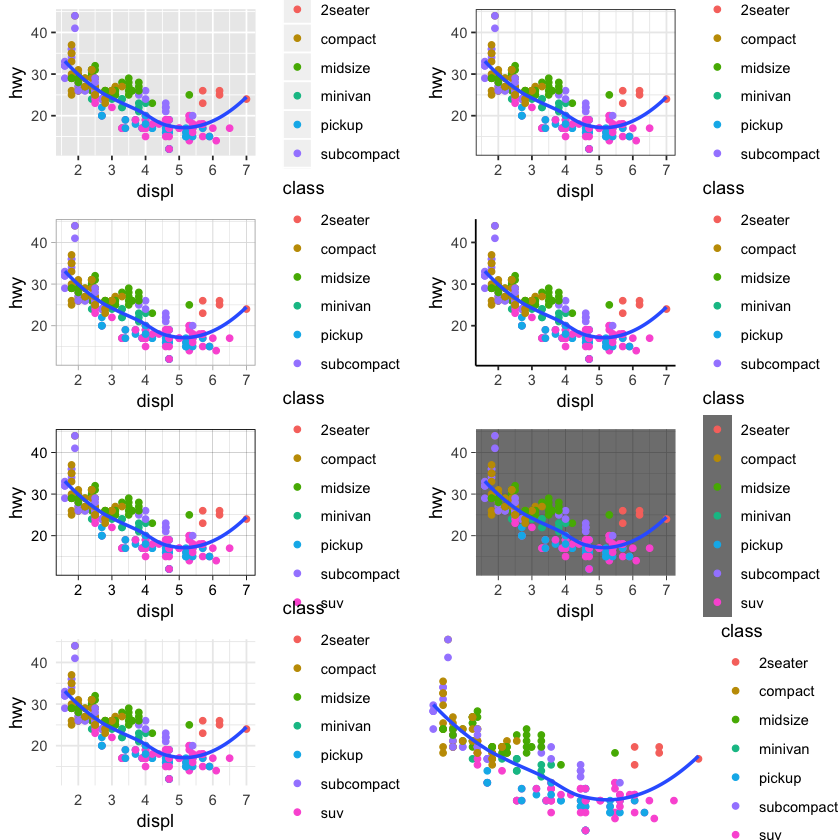

In [63]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE)

p1 <- base + theme_bw()
p2 <- base + theme_light()
p3 <- base + theme_classic()
p4 <- base + theme_linedraw()
p5 <- base + theme_dark()
p6 <- base + theme_minimal()
p7 <- base + theme_void()

grid.arrange(base,p1,p2,p3,p4,p5,p6,p7,nrow=4)

## Saving your plots

 * `ggsave()` will save most recent plot to disk
 * `tiff()` will save next plot to disk
 * Other functions like `postscript()` for eps files, etc.
 * All can take `width`, `height`, `fonts`, `pointsize`, `res` (resolution) arguments

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


pdf 
  2

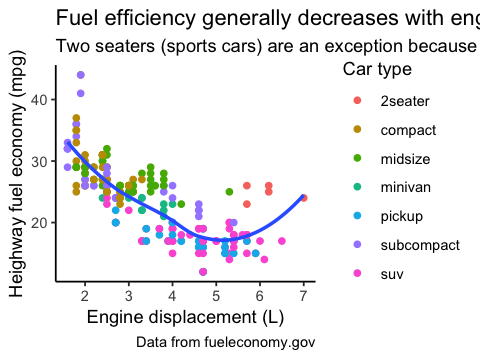

In [32]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + x_scale + y_scale + theme_classic()
p1
ggsave("my_plot.pdf")

tiff("my_plot.tiff",width=7,height=5,units="in",pointsize=8,res=350)
p1
dev.off()

# Some other useful visualization packages

We don't have time in this workshop to get in depth to other workshops, but here are some more useful visualization packages that may be helpful for your research.

## ggtree for phylogenetics

Resources and associated packages:
 * [Data Integration, Manipulation and Visualization of Phylogenetic Trees](https://yulab-smu.github.io/treedata-book/index.html)
 * [treeio](https://bioconductor.org/packages/release/bioc/html/treeio.html)
 * [tidytree](https://cran.r-project.org/web/packages/tidytree/index.html)
 
## cowplot

Meant to provide publication-ready theme for **gplot2** that requires minimum amount of fiddling with sizes of axis labels, plot backgrounds, etc. Auto-sets `theme_classic()` for all plots.

In [65]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.3

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  maps_3.3.0      ggrepel_0.8.0   gridExtra_2.3  
 [5] modelr_0.1.2    forcats_0.3.0   stringr_1.3.1   dplyr_0.7.8    
 [9] purrr_0.2.5     readr_1.3.1     tidyr_0.8.2     tibble_2.0.1   
[13] ggplot2_3.1.0   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.19.2        reshape2_1.4.3    
 [5] haven_2.0.0        lattice_0.20-38    colorspace_1.4-0   generics_0.0.2    
 [9] viridisLite_0.3.0  htmltools_0.3.6    base64enc_0